In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
file_path = "/Users/yiyun.du/Documents/Python project/PR data analysis/PR data.xlsx"
df = pd.read_excel(file_path)

In [76]:
#Change Column name and Drop those unnecessary columns
df.columns = ['edit date', 'user name', 'Applicant Profile','Result','Application Start Date','Application End Date', 'Update Date']
df = df.drop(columns = ['edit date', 'user name', 'Update Date'])

In [77]:
df.head(5)

,Applicant Profile,Result,Application Start Date,Application End Date
0,国内双非本 27岁 来新4年+ IT行业 Basic 5.3k,杯具,2022-10-21 00:00:00,2023-02-22 00:00:00
1,95后夫妻双EP共同申请 男: 211本科 来新两年半 建筑业 女: 本地公立硕 来新两年 ...,等待,2023-11-09 00:00:00,NaN
2,"30, 頂客，台大碩+NUS碩，EP(IT)+SP，申請時來星兩年，八個月時補交家人工作經歷...",通过,2022-10-17 00:00:00,2023-10-23 00:00:00
3,自雇人士，薪资1.2w，pr-15年，来新20年，2个女孩，第二次申请公民，刚杯具。 老公来...,杯具,2022-03-27 00:00:00,2023-10-17 00:00:00
4,31，夫妻一起申请无娃，均是国内本硕，双 PEP 来新一年半，都是 IT 行业 Senior...,等待,2023-10-21 00:00:00,NaN


In [78]:
# Find Unique values of a column
unique_values = df['Result'].unique()
print (unique_values)

['杯具' '等待' '通过' '上诉中' '进行中' nan '失败' '批准']


In [79]:
# Convert the chinese content to english version
df['Result'] = df['Result'].replace('杯具', 'Failed', regex=True)
df['Result'] = df['Result'].replace('等待', 'Pending', regex=True)
df['Result'] = df['Result'].replace('通过', 'Approved', regex=True)
df['Result'] = df['Result'].replace('上诉中', 'Appeal', regex=True)
df['Result'] = df['Result'].replace('进行中', 'Pending', regex=True)
df['Result'] = df['Result'].replace('失败', 'Failed', regex=True)
df['Result'] = df['Result'].replace('批准', 'Approved', regex=True)

In [80]:
# Remove those Result or Application Start Date is NA
df = df.dropna(subset=['Result', 'Application Start Date'])

In [81]:
# Find out how many NA values in each column
missing_summary = df.isna().sum()
print (missing_summary)

Applicant Profile           7
Result                      0
Application Start Date      0
Application End Date      746
dtype: int64


In [83]:
df = df.reset_index(drop=True) 
df 

,Applicant Profile,Result,Application Start Date,Application End Date
0,国内双非本 27岁 来新4年+ IT行业 Basic 5.3k,Failed,2022-10-21 00:00:00,2023-02-22 00:00:00
1,95后夫妻双EP共同申请 男: 211本科 来新两年半 建筑业 女: 本地公立硕 来新两年 ...,Pending,2023-11-09 00:00:00,NaN
2,"30, 頂客，台大碩+NUS碩，EP(IT)+SP，申請時來星兩年，八個月時補交家人工作經歷...",Approved,2022-10-17 00:00:00,2023-10-23 00:00:00
3,自雇人士，薪资1.2w，pr-15年，来新20年，2个女孩，第二次申请公民，刚杯具。 老公来...,Failed,2022-03-27 00:00:00,2023-10-17 00:00:00
4,31，夫妻一起申请无娃，均是国内本硕，双 PEP 来新一年半，都是 IT 行业 Senior...,Pending,2023-10-21 00:00:00,NaN
...,...,...,...,...
2204,本人国内重点大学硕士，来新4年半，PR两年半，薪水4000+，替老婆申请，老婆国内重点大学硕...,Approved,2011-04-04 00:00:00,2011-09-23 00:00:00
2205,国内重点本科毕业， 来新2年， 公司是世界500强， 薪水4500++， 老婆是PR， 结婚...,Failed,2011-03-12 00:00:00,2011-09-20 00:00:00
2206,我在新工作四年，EP，月薪3000+，老婆过来一年，DP，月薪1500.两人一起申请，我是主...,Approved,2011-03-19 00:00:00,2011-10-31 00:00:00
2207,国内本科，来新2年，工资3000+，老公NUS博士在读。,Failed,2011-07-29 00:00:00,2011-11-01 00:00:00


In [85]:
def is_str_or_int(data_type):
    return data_type in (str, int)

# Create a new column with the data types of each cell in 'Column1'
df['Data_Type'] = df['Application Start Date'].apply(type)

# Filter the DataFrame to include only cells with data types of str or int
filtered_df = df[df['Data_Type'].apply(is_str_or_int)]

# Display the filtered DataFrame
filtered_df.head(5)

,Applicant Profile,Result,Application Start Date,Application End Date,Data_Type
178,未婚单亲PR妈妈担保儿子，pending 18个月半Approved,Approved,2021-10,2023-04-19 00:00:00,<class 'str'>
986,"女，新加坡本地大学master,来新6年，考过olevel，目前刚毕业无业。老公新加坡人，s...",Approved,20190915,20200620,<class 'int'>
1067,26岁 EP2年 马来西亚人，制造业,Approved,20190410,20190614,<class 'int'>
1233,老公SC 帮我和前夫的女儿一起担保申请，女儿政府学校中二，我拿loc 工作薪水3000，有个...,Pending,2018年1月3号,2018年10月18号,<class 'str'>
1699,test test,Approved,43243434,2016-04-14 00:00:00,<class 'int'>


In [86]:
# For the above weird application start dates, change them to correct ones
df.at[178,'Application Start Date'] = pd.to_datetime('2021-10-01')
df.at[986,'Application Start Date'] = pd.to_datetime('2019-09-15')
df.at[986,'Application End Date'] = pd.to_datetime('2020-06-20')
df.at[1067,'Application Start Date'] = pd.to_datetime('2019-04-10')
df.at[1067,'Application End Date'] = pd.to_datetime('2019-06-14')
df.at[1233,'Application Start Date'] = pd.to_datetime('2018-01-03')
df.at[1233,'Application End Date'] = pd.to_datetime('2018-10-18')
df.at[1959,'Application Start Date'] = pd.to_datetime('2012-12-18')
df.at[1965,'Application Start Date'] = pd.to_datetime('2013-09-27')
df.at[1965,'Application End Date'] = pd.to_datetime('2014-05-26')
df.at[2016,'Application Start Date'] = pd.to_datetime('2012-12-01')
df.at[2016,'Application End Date'] = pd.to_datetime('2012-04-01')
df.at[2076,'Application Start Date'] = pd.to_datetime('2011-06-01')
df.at[2076,'Application End Date'] = pd.to_datetime('2011-10-01')
df.at[2174,'Application Start Date'] = pd.to_datetime('2011-02-28')
df.at[2178,'Application Start Date'] = pd.to_datetime('2011-06-09')
df.at[2191,'Application Start Date'] = pd.to_datetime('2011-07-11')

In [88]:
# test how many data has been filted
# Create a new column with the data types of each cell in 'Column1'
df['Data_Type'] = df['Application Start Date'].apply(type)

# Filter the DataFrame to include only cells with data types of str or int
filtered_df = df[df['Data_Type'].apply(is_str_or_int)]

# Display the filtered DataFrame
filtered_df.head(5)

,Applicant Profile,Result,Application Start Date,Application End Date,Data_Type
1699,test test,Approved,43243434,2016-04-14 00:00:00,<class 'int'>


In [89]:
# Specify the row index to drop
row_index_to_drop = 1699
df = df.drop(index=row_index_to_drop)

In [90]:
# test how many data has been filted
# Create a new column with the data types of each cell in 'Column1'
df['Data_Type'] = df['Application Start Date'].apply(type)

# Filter the DataFrame to include only cells with data types of str or int
filtered_df = df[df['Data_Type'].apply(is_str_or_int)]

# Display the filtered DataFrame
filtered_df.head(5)

,Applicant Profile,Result,Application Start Date,Application End Date,Data_Type


In [91]:
# After we deal with Application Start Date, now we do the same with Application End Date
# test how many data has been filted
# Create a new column with the data types of each cell in 'Column1'
df['Data_Type'] = df['Application End Date'].apply(type)

# Filter the DataFrame to include only cells with data types of str or int
filtered_df = df[df['Data_Type'].apply(is_str_or_int)]

# Display the filtered DataFrame
filtered_df.head(5)

,Applicant Profile,Result,Application Start Date,Application End Date,Data_Type
1456,单身 SP 来新2年,Pending,2017-05-25 00:00:00,pending,<class 'str'>
2008,老公新加坡人，结婚四年，生两个小孩了，现在我拿家属证，老公月薪五千，有三年的所得税，,Appeal,2013-04-30 00:00:00,2013,<class 'int'>
2142,男 本科 4000+薪水， 在新工作3年半 女 大专 2000 在新工作2年半。 一起申请。,Approved,2011-06-24 00:00:00,2011-10.28,<class 'str'>


In [92]:
df.at[1456,'Application End Date'] = None
df.at[2008,'Application End Date'] = pd.to_datetime('2013-12-31')
df.at[2142,'Application End Date'] = pd.to_datetime('2011-10-28')

In [93]:
df['Data_Type'] = df['Application End Date'].apply(type)

# Filter the DataFrame to include only cells with data types of str or int
filtered_df = df[df['Data_Type'].apply(is_str_or_int)]

# Display the filtered DataFrame
filtered_df

,Applicant Profile,Result,Application Start Date,Application End Date,Data_Type


In [94]:
## Create a column called Application days
df['Application days'] = df['Application End Date'] - df['Application Start Date']
# For application results = pending， make their application days = today - application start date
df.loc[df['Result'] == 'Pending', 'Application days'] = pd.to_datetime('2023-10-27')-df['Application Start Date']

In [95]:
df.describe()

,Application days
count,2140
mean,646 days 11:55:57.757009344
std,812 days 05:02:03.910648672
min,-610 days +00:00:00
25%,165 days 00:00:00
50%,266 days 00:00:00
75%,746 days 06:00:00
max,4660 days 00:00:00


In [96]:
# Drop all the na values in column 'Application days' - nothing has been dropped
df = df.dropna(subset=['Application days'])
df.describe()

,Application days
count,2140
mean,646 days 11:55:57.757009344
std,812 days 05:02:03.910648664
min,-610 days +00:00:00
25%,165 days 00:00:00
50%,266 days 00:00:00
75%,746 days 06:00:00
max,4660 days 00:00:00


In [98]:
# Convert Application days from timedelta to int
df['Application days'] = df['Application days'].dt.days.astype('Int64')
df.head(5)

,Applicant Profile,Result,Application Start Date,Application End Date,Data_Type,Application days
0,国内双非本 27岁 来新4年+ IT行业 Basic 5.3k,Failed,2022-10-21 00:00:00,2023-02-22 00:00:00,<class 'datetime.datetime'>,124
1,95后夫妻双EP共同申请 男: 211本科 来新两年半 建筑业 女: 本地公立硕 来新两年 ...,Pending,2023-11-09 00:00:00,NaN,<class 'float'>,-13
2,"30, 頂客，台大碩+NUS碩，EP(IT)+SP，申請時來星兩年，八個月時補交家人工作經歷...",Approved,2022-10-17 00:00:00,2023-10-23 00:00:00,<class 'datetime.datetime'>,371
3,自雇人士，薪资1.2w，pr-15年，来新20年，2个女孩，第二次申请公民，刚杯具。 老公来...,Failed,2022-03-27 00:00:00,2023-10-17 00:00:00,<class 'datetime.datetime'>,569
4,31，夫妻一起申请无娃，均是国内本硕，双 PEP 来新一年半，都是 IT 行业 Senior...,Pending,2023-10-21 00:00:00,NaN,<class 'float'>,6


In [99]:
# Apparently, there are negative data points in applicaation days which should be non-sense.
# Let's remove those negative application days.
df = df[df['Application days'] > 0]
df.describe()

,Application days
count,2122.0
mean,653.212535
std,812.238131
min,2.0
25%,168.0
50%,268.5
75%,758.5
max,4660.0


## Data Cleaning is done.
## Now we do analysis

In [100]:
# Create a result count dataframe
df_result = df['Result'].value_counts()

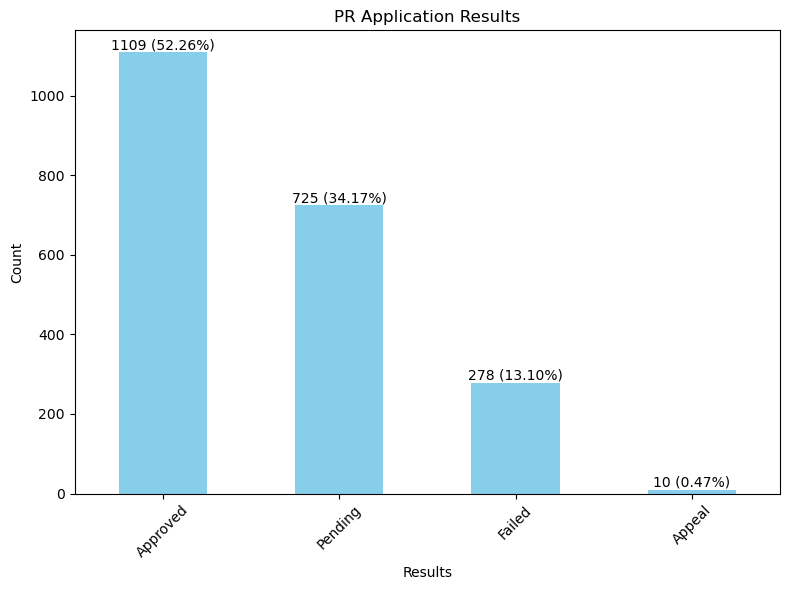

In [109]:
# Calculate percentages
total_count = len(df['Result'])  # Total count of values in column 'B'
percentages = (df_result / total_count) * 100

# Plotting a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
bars = df_result.plot(kind='bar', color='skyblue')  # Creating the bar plot

# Adding counts and percentages as annotations on top of each bar
for i, (v, p) in enumerate(zip(df_result, percentages)):
    plt.text(i, v + 0.2, f"{v} ({p:.2f}%)", ha='center', va='bottom')

plt.title('PR Application Results')
plt.xlabel('Results')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()

### Analyse the Failed results

In [111]:
df_failed = df[df['Result'] == 'Failed']
df_failed.describe()

,Application days
count,278.0
mean,162.579137
std,91.479807
min,3.0
25%,106.5
50%,139.0
75%,189.0
max,569.0


/var/folders/9m/mp1d4sz95tx65xkdlv3xzsrc0000gq/T/ipykernel_47837/1022642185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_failed['Application months'] = df_failed['Application days']/30
/var/folders/9m/mp1d4sz95tx65xkdlv3xzsrc0000gq/T/ipykernel_47837/1022642185.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_failed['category'] = pd.cut(df_failed['Application months'], bins=intervals)


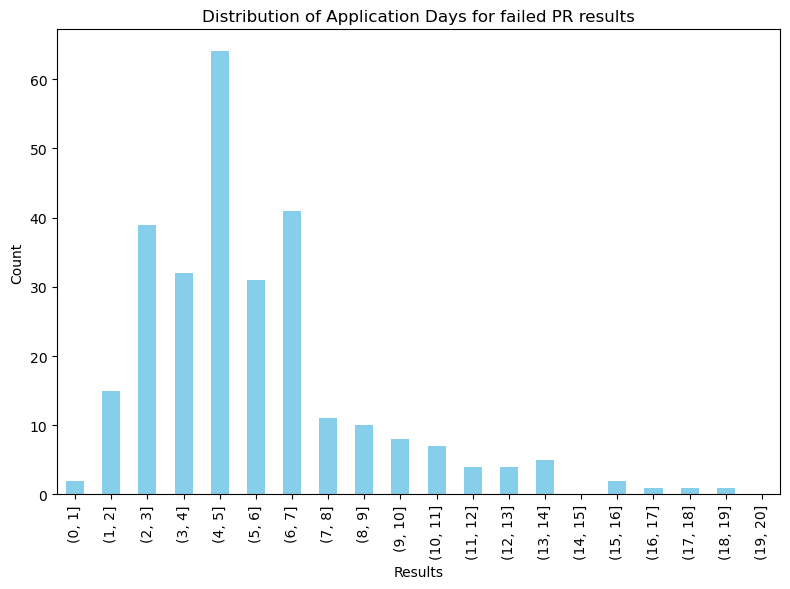

In [126]:
# Assuming df is your DataFrame with 'application_days' column
# Define the intervals
intervals =  list(range(21))  # Define your intervals as needed
df_failed['Application months'] = df_failed['Application days']/30
# Categorize application days into defined intervals
df_failed['category'] = pd.cut(df_failed['Application months'], bins=intervals)

# Group by category and count the occurrences in each category
grouped = df_failed.groupby('category').size()

# Plotting the grouped data
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
grouped.plot(kind='bar', color='skyblue')
plt.title("Distribution of Application Days for failed PR results")
plt.xlabel('Results')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Analyse the Successful results

In [122]:
df_approv = df[df['Result'] == 'Approved']
df_approv.describe()

,Application days
count,1109.0
mean,238.444545
std,116.364142
min,2.0
25%,156.0
50%,219.0
75%,298.0
max,931.0


/var/folders/9m/mp1d4sz95tx65xkdlv3xzsrc0000gq/T/ipykernel_47837/2503661646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_approv['Application months'] = df_approv['Application days']/30
/var/folders/9m/mp1d4sz95tx65xkdlv3xzsrc0000gq/T/ipykernel_47837/2503661646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_approv['category'] = pd.cut(df_approv['Application months'], bins=intervals_approv)


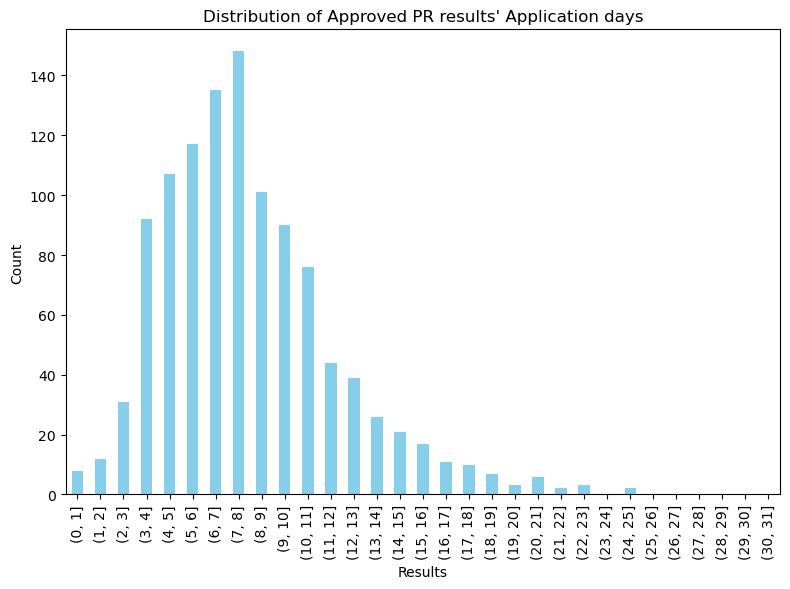

In [127]:
# Assuming df is your DataFrame with 'application_days' column
# Define the intervals
intervals_approv =  list(range(32))  # Define your intervals as needed
df_approv['Application months'] = df_approv['Application days']/30
# Categorize application days into defined intervals
df_approv['category'] = pd.cut(df_approv['Application months'], bins=intervals_approv)

# Group by category and count the occurrences in each category
grouped_approv = df_approv.groupby('category').size()

# Plotting the grouped data
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
grouped_approv.plot(kind='bar', color='skyblue')
plt.title("Distribution of Approved PR results' Application days")
plt.xlabel('Results')
plt.ylabel('Count')
plt.tight_layout()
plt.show()